## Missing features and unphysiological parameter regimes

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import likelihoodfree.io as io
import likelihoodfree.viz as viz
import likelihoodfree.PDF as lfpdf
import os

from lfmods.hh import HHSimulator

# colors
col_original = (35/255,86/255,167/255)

## Set up the HH simulator

In [2]:
sim = HHSimulator(seed=100,pilot_samples=0.,cached_sims=False, cached_pilot=False)

###############################################################################
# ground-truth parameters
true_params = sim.true_params
n_params = sim.n_params

init = sim.init

###############################################################################
# time
t = sim.t
dt = sim.dt
duration = np.max(t)

###############################################################################
# input
I = sim.I_obs

###############################################################################
# prior over parameters
sim_prior = sim.sim_prior
sim_prior()
prior_min = sim.prior_min
prior_max = sim.prior_max

###############################################################################
# if parameters in transformed space, inverse transform function
param_invtransform = sim.param_invtransform

###############################################################################
# simulator
bm = sim.bm

## Unphysiological parameter regimes

/Users/pedro/Documents/repos/likelihoodfree-models/lfmods/hh_bm.py:166: RuntimeWarning: overflow encountered in double_scalars
  I_K = (n[i-1]**4)*gbar_K*(V[i-1]-E_K)
/Users/pedro/Documents/repos/likelihoodfree-models/lfmods/hh_bm.py:79: RuntimeWarning: overflow encountered in exp
  return 0.28*v1 / (np.exp(0.2*v1)-1.)
/Users/pedro/Documents/repos/likelihoodfree-models/lfmods/hh_bm.py:105: RuntimeWarning: overflow encountered in exp
  return tau_max/(3.3*np.exp(0.05*v1) + np.exp(-0.05*v1))
/Users/pedro/Documents/repos/likelihoodfree-models/lfmods/hh_bm.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  p[i] = p[i-1] + tstep*(p_inf(V[i-1])-p[i-1])/tau_p(V[i-1])
/Users/pedro/Documents/repos/likelihoodfree-models/lfmods/hh_bm.py:174: RuntimeWarning: invalid value encountered in double_scalars
  V[i] = V[i-1] + tstep*(I_ion + nois_fact*self.rng.randn()/(tstep**0.5))/C
/Users/pedro/Documents/repos/likelihoodfree-models/lfmods/hh_bm.py:92: RuntimeWarning: invalid value en

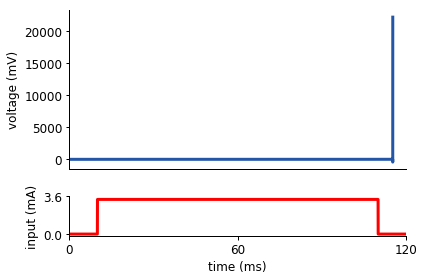

In [3]:
# simulate
fact = 0.2
new_prior_min = fact*prior_min
new_prior_max = fact*prior_max
np.random.seed(123)
z = np.random.rand(n_params)
params = param_invtransform( np.multiply(new_prior_max - new_prior_min,z) + new_prior_min )
hh = bm.HH(init, params.reshape(1,-1),seed=230)
states = hh.sim_time(dt, t, I)[:,0]

# plot
fig = plt.figure()

gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[4, 1])
ax = plt.subplot(gs[0])
plt.plot(t, states, color = col_original, lw=3)
plt.ylabel('voltage (mV)')

ax.set_xlim([0, duration])
ax.set_xticks([])

ax = plt.subplot(gs[1])
plt.plot(t,I,'r', lw=3)
plt.xlabel('time (ms)')
plt.ylabel('input (mA)')

ax.set_xlim([0, duration])
ax.set_xticks([0, duration/2, duration])
ax.set_yticks([0, 1.1*np.max(I)])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

plt.tight_layout()

## Missing features

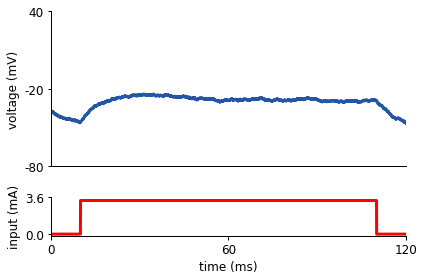

In [4]:
# simulate
fact = .9
new_prior_min = fact*prior_min
new_prior_max = fact*prior_max
np.random.seed(123)
z = np.random.rand(n_params)
params = param_invtransform( np.multiply(new_prior_max - new_prior_min,z) + new_prior_min )
hh = bm.HH(init, params.reshape(1,-1),seed=230)
states = hh.sim_time(dt, t, I)[:,0]

# plot
fig = plt.figure()

gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[4, 1])
ax = plt.subplot(gs[0])
plt.plot(t, states, color = col_original, lw=3)
plt.ylabel('voltage (mV)')

ax.set_xlim([0, duration])
ax.set_xticks([])
ax.set_yticks([-80, -20, 40])

ax = plt.subplot(gs[1])
plt.plot(t,I,'r', lw=3)
plt.xlabel('time (ms)')
plt.ylabel('input (mA)')

ax.set_xlim([0, duration])
ax.set_xticks([0, duration/2, duration])
ax.set_yticks([0, 1.1*np.max(I)])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

plt.tight_layout()